# Learning outcomes
1. Gentle intro on cv
2. Recap on images as Numpy array
3. Image cropping
4. Splitting and merging of color channels
5. Point operators
    - elementary operations: addition, substraction, multuplication and division
    - gamma correction (nonlinear technique)
6. Image blending (add 2 images together)

## Setup

In [1]:
import sys
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
from util_func import show_img

## Recap on images as Numpy array
There are 2 primary types of images: **grayscale** and **color**.

| grayscale | color |
| :-: | :-: |
| matrix (2D array) | 3D array|
| (h, w) | (h,w, channels) |

In [2]:
# Create a grayscale image
img = np.zeros((2,4), dtype=np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [3]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [4]:
img[0, 1] = 50
img[1, 2] = 150

print(img)

[[  0  50   0   0]
 [  0   0 150   0]]


In [5]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color)

[[[  0   0   0]
  [ 50  50  50]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [150 150 150]
  [  0   0   0]]]


## Access elements in array

In [6]:
img = cv.imread("images/lena.jfif")

a = img[49, 219, 2]
b = img.item(49, 219, 2)
a == b

True

In [7]:
%timeit a = img[49, 219, 2]
%timeit b = img.item(49, 219, 2)

53.2 ns ± 1.11 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
43.2 ns ± 0.705 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### Numpy slicing

In [8]:
h, w = img.shape[:2]
yc, xc = h // 2, w // 2

topleft = img[:yc, :xc]

show_img("topleft", topleft)

In [9]:
# 60 x 60 central region of image
centre = img[yc-30:yc+30, xc-30:xc+30]

show_img("centre", centre)

## Create a white image

In [10]:
img = np.zeros((200, 200)) + 255
img = np.uint8(img)

show_img("img", img)

## Exercise

In [11]:
## Extract region of interest
img = cv.imread("images/flower.jfif")

show_img("img", img)

#### There are three ways to get the indices needed.

In [2]:
# 1 way
img = cv.imread("images/flower.jfif")
img_copy = img.copy()

def rect_region(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        cv.circle(img, (x, y), 1, (0, 0, 255), -1)
        cv. imshow("img", img)

cv.imshow("img", img)
cv.setMouseCallback("img", rect_region)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
flower = img_copy[41:120, 89:173]

show_img("flower", flower)

In [3]:
# 2nd way:
bbox = cv.selectROI("crop", img_copy)

flower = img_copy[int(bbox[1]): int(bbox[1] + bbox[3]),
                  int(bbox[0]): int(bbox[0] + bbox[2])]

show_img("flower", flower)

In [18]:
# 3rd way: paint app

In [4]:
img_arr = np.zeros((30,30), dtype=np.uint8)

img_arr[:10, 10:20] = 255
img_arr[10:20, :10] = 255
img_arr[10:20, 20:] = 255
img_arr[20:, 10:20] = 255

img = np.tile(img_arr, (3, 3))

show_img("pattern", img)

## Image cropping
Why?
- Remove unwanted object
- Separate the image into a $3 \times 3$ grids. We move / adjust the camera in such a way that the object of interest lies on the gridlines or their intersection. As such, your image would look more aethetically appealing. This is known as rule of thirds.
- One of the image augmentation methods for DL model training.

In [7]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

h, w = img.shape[:2]
# user defined parameters
n_vertical_grids = 4
n_horizontal_grids = 4

M = int(h / n_vertical_grids)
N = int(w / n_horizontal_grids)

tiles = []

for y in range(0, h, M):
    for x in range(0, w, N):
        x1 = x + N
        y1 = y + N
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            title = img[y:h, x:w]
            tiles.append(title)
        
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            title = img[y:h, x:x1]
            tiles.append(title)
            
        elif x1 > w :
            x1 = 2 - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            title = img[y:y1, x:w]
            tiles.append(title)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            title = img[y:y1, x:x1]
            tiles.append(title)
            
show_img("crop", img_copy)

In [8]:
show_img("patch", tiles[9])

## Splitting and merging color channels

In [9]:
img = cv.imread("images/lena.jfif")

(b, g, r) = cv.split(img)
img_merge = cv.merge((b, g, r))
np.array_equal(img, img_merge)

True

In [2]:
import matplotlib.pyplot as plt

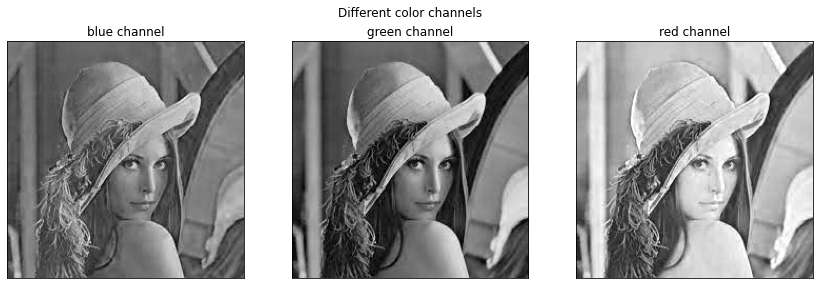

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4), sharey=True)
fig.suptitle("Different color channels")

ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title="blue channel", xticks=[], yticks=[])
ax2.imshow(g, cmap=plt.cm.gray)
ax2.set(title="green channel", xticks=[], yticks=[])
ax3.imshow(r, cmap=plt.cm.gray)
ax3.set(title="red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

## Exercise (Display different channels in color images)
1. Display the blue, green and red channel of the lena image simultaneously. Comment on the images displayed.
2. Display the following images which originates from the file "images/dog.jfif".

In [22]:
img = cv.imread("images/dog.jfif")

channels = cv.split(img)
# This color variable will be window namees
colors = ("blue", "green", "red")

imgs = []

for i, ch in enumerate(channels):
    img_arr = np.zeros_like(img)
    img_arr[..., i] = ch
    imgs.append(img_arr)

for c, img in zip(colors, imgs):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators
Elementray maath operations: addtion, substraction, multiplication and division.

$$f_{trans}(\textbf{x}) = \alpha f(\textbf{x}) + \beta $$

In [23]:
np.uint8(np.array([-2, 0, 255, 300]))

array([254,   0, 255,  44], dtype=uint8)

In [3]:
def point_op(img, alpha, beta):
    """point operators of image. Arguments:
    1. source image
    2. multiplier
    3. constant"""
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [25]:
img = cv.imread("images/bridge.jfif")

# increase the brightness and contrast
transform = point_op(img, 1.6, 20)

cv.imshow("original", img)
show_img("transform", transform)

In [26]:
darken = point_op(img, 1, -80)

show_img("img", darken)

## Gamma correction
Technique to adjust brightness of image.

$$O = (\frac{I}{255}) ^ {\gamma} \times 255$$

In [34]:
gamma = 1 / 2.2

lookUpTable = np.empty((1, 256), dtype = np.uint8)

for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    
img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img)
show_img("gamma correction", res, adjust=True)

## Image blending (add 2 images)
```
cv.addWeighted(img1, alpha, img2, 1-alpha, beta)
```

$$h(\textbf{x}) = \alpha f(\textbf{x}) + (1 - \alpha)g(\textbf{x}) + \beta$$

In [33]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# resize img2 to be the same dimension as img
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))
alpha = 0.7

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0 ,res)

cv.imshow("lena", img)
cv.imshow("resized coin", img2)
show_img("image blending", res)

## Weekly Activity 1
Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

In [4]:
random_color_img = np.random.randint(0, high = 256, size=(250,250,3), dtype=np.uint8)
random_grayscale_img = np.random.randint(0, high = 256, size=(250,250), dtype=np.uint8)

cv.imshow("Random color image", random_color_img)
cv.imshow("Random grayscale image", random_grayscale_img)
cv.waitKey(0)
cv.destroyAllWindows()

## Weekly Activity 2

In [7]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    '''
    img is the source image.
    num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
    line_color is the color of the grid line.
    The output of the function should be image with grids.
    '''
    img = cv.imread(img)
    img_copy = img.copy()
    
    height, width = img.shape[:2]
    num_horizontal_patches = num_horizontal_grid
    num_vertical_patches = num_vertical_grid
    
    M, N = int(height / num_vertical_patches), int(width / num_horizontal_patches)
    
    x1, y1 = 0, 0
    tiles = []
    
    for y in range(0, height, M):
        for x in range(0, width, N):
            
            x1 = x + N
            y1 = y + M

            if x1 > width and y1 > height:
                x1 = width - 1
                y1 = height - 1
                tile = img[y:height, x:width]
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tiles.append(tile)

            elif y1 > height:
                y1 = height - 1
                tile = img[y:height, x:x1]
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tiles.append(tile)

            elif x1 > width:
                x1 = width - 1
                tile = img[y:y1, x:width]
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tiles.append(tile)

            else:
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:y1, x:x1]
                tiles.append(tile)

    show_img("crop_grid", img_copy)

In [8]:
crop_grid("images/dog.jfif", 10, 10, (0,5,0)) 

## Weekly Activity 3

In [24]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# resize img2 to be the same dimension as img
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

for alpha in range(0, 51):
    alpha /= 50
    res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)
    cv.imshow("Image blending", res)
    cv.waitKey(1)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Weekly Activity 4

In [28]:
img = cv.imread("images/travel_hd.jpg")
watermark = cv.imread("images/watermark.png")

#resize image
img = cv.resize(img, None, fx=0.1, fy=0.1)
h, w = img.shape[:2]

# Define the position of the watermark
watermark_position = (10, img.shape[0] - watermark.shape[0] - 10)

# Create a Region of Interest (ROI) for the watermark in img
roi = img[watermark_position[1]:watermark_position[1] + watermark.shape[0],
                    watermark_position[0]:watermark_position[0] + watermark.shape[1]]

# Combine the watermark icon and the ROI
watermarked_roi = cv.addWeighted(roi, 1, watermark, 0.6, 0)

# Replace the ROI in the img with the watermarked ROI
img[watermark_position[1]:watermark_position[1] + watermark.shape[0],
               watermark_position[0]:watermark_position[0] + watermark.shape[1]] = watermarked_roi

cv.imwrite("watermarked_travel_hd.jpg", img)
show_img("Watermark image", img)